In [3]:
from dataset import tweetProccess
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import nltk, re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer as si


'''gets the data'''
dataHandler = tweetProccess.FileTreat()
#content = dataHandler.getBadTweets()
#content = (content, [-1 for i in range(len(content))])
content = dataHandler.getAsDocument()
print(len(content))

no_features = 2000


#Use to download nltk content
#nltk.download()

'''defining a function to remove numbers'''
def tokenize(text):
    tokenized = []
    for word in nltk.word_tokenize(text):
        if re.search('[a-zA-Z]', word):
            tokenized.append(word.lower())
            
    return tokenized

'''defining a function to tokenize and get only vebs and adjectivies'''
def tokenizeStructures(text):
    
    #words = [nltk.corpus.words.words()]
    #print(words[:3])
    
    #text = " ".join(w for w in nltk.wordpunct_tokenize(words) if w.lower() in words)
    #print(text)
    
    #gets the type of each word in the text
    tags = pos_tag(word_tokenize(text))
    
    interesting = []
    for tag in tags:
        #removes tweet links
        if re.search('t.co+', tag[0]):
            continue
        
        if (tag[1] == 'VERB' or tag[1] == 'JJ') and len(tag[0]) > 2:
            interesting.append(tag[0])
    
    return interesting

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    



2


In [4]:
no_topic = 10

lda = LatentDirichletAllocation(n_components=no_topic, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
tf_vectorizer = CountVectorizer(tokenizer=tokenizeStructures, max_features=no_features, stop_words='english')


tf = tf_vectorizer.fit_transform(content[0])

tf_feature_names = tf_vectorizer.get_feature_names()
topics = lda.fit(tf)

In [10]:
print_top_words(lda, tf_feature_names, 10)

Topic #0: chinese makeupoftheday nadinelustre motd nadine proverbs beyondbeautiful ilovemakeup daddydomsexual lovebrooklyn
Topic #1: meditate ptsd mindful mentalhealth… buddhist depressed nlighten anxious god sober
Topic #2: mental suicide selfharm free ana depressed important mentalillness good harm
Topic #3: naman ang nga ako kong akong mong lang yan ngayon
Topic #4: capricorn niallofficial nightlit fun different louis unsplash content social btsforvmas
Topic #5: good happy new beautiful ive dont great little bad real
Topic #6: una que não los uma noaisqueen moldavite tuitutil las nuevos
Topic #7: soundcloud nak untuk niet 블랙핑크 een indiemusic aku nendoroid ada
Topic #8: ive good happy sad dont bad fat hard fucking wish
Topic #9: new great free good white big black happy available little


In [ ]:
print(lda.components_)

In [4]:


for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    #print("doc: {} topic: {}\n".format(n,topic_most_pr))

In [5]:
print(doc_topic[1])

print(doc_topic.shape[0])
print(len(content))

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
240092
2


In [7]:
import pandas as pd

doc_topic = lda.transform(tf)

#gets the topics
topics = [i.argmax() for i in doc_topic]

table = {'text': content[0], 'labels': content[1], 'topic': topics, 'id': range(len(content[0])) }
frame = pd.DataFrame(table, index=content[1], columns=['text', 'labels', 'topic', 'id'])


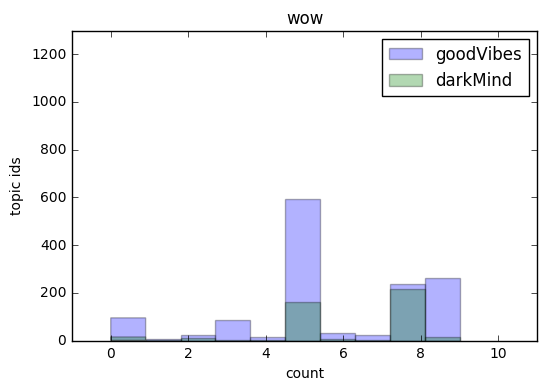

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#print(frame['topic'][-1])

width = 0.01
#set up the histogram
x0 = frame['topic'][1]
x1 = frame['topic'][-1]
plt.hist(x0, alpha=0.3, label='goodVibes')
plt.hist(x1, alpha=0.3, label='darkMind')
plt.legend(loc='upper right')
plt.xlabel('count')
plt.ylabel('topic ids')
plt.title('wow')
plt.axis([-1, 11, 0, 1300])

plt.show()

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
#dist = 1 - cosine_similarity(tf)

#print(dist)